In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import scipy.stats as sts
import requests
import json
from pprint import pprint
import gmaps

# API Keys
from my_keys import g_key
gmaps.configure(api_key=g_key)

In [2]:
ca_2019_data=pd.read_csv("output_census/census_ca_2019.csv")
ca_2019_data.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Rate,Unemployment Rate,House Value,House Construction Year,Monthly Owner Cost,...,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,City,County,Lat,Lng,Housing_units,State
0,95140,102.0,54.2,-666666666.0,54873.0,13.725490,0.000000,1026800.0,1970,4001.0,...,85.294118,14.705882,13.725490,0.000000,Los Angeles,Los Angeles County,33.97,-118.25,13788,CA
1,95148,48273.0,40.3,138763.0,41013.0,6.686968,3.281337,865000.0,1981,3114.0,...,22.540551,2.450645,26.113977,60.835250,Los Angeles,Los Angeles County,33.95,-118.25,12598,CA
2,95202,6066.0,39.2,14822.0,14840.0,45.812727,4.154303,216900.0,1942,1730.0,...,52.472799,20.128586,44.048797,12.858556,Los Angeles,Los Angeles County,33.96,-118.27,17127,CA
3,95203,15487.0,34.4,44922.0,22045.0,25.182411,5.604701,226400.0,1947,1358.0,...,58.862272,12.391038,57.938917,5.172080,Los Angeles,Los Angeles County,34.08,-118.31,24278,CA
4,95204,28667.0,37.0,53077.0,29062.0,15.244009,4.161580,244700.0,1953,1563.0,...,61.684166,7.758049,44.465762,9.966163,Los Angeles,Los Angeles County,34.06,-118.31,16345,CA


In [3]:
ca_2019_data.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [21]:
community_data=ca_2019_data[['Zipcode','City', 'County','Population','White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate','Per Capita Income','Poverty Rate',
              'House Value','Monthly Rent']]

community_data=community_data[(community_data[["Population","White Population Rate",
                               "Black Population Rate","Hispanic Population Rate",
                               "Asian Population Rate","Per Capita Income","Poverty Rate",
                               "House Value","Monthly Rent"]] > 0).all(1)]
community_data.head(5)

,Zipcode,City,County,Population,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Per Capita Income,Poverty Rate,House Value,Monthly Rent
1,95148,Los Angeles,Los Angeles County,48273.0,22.540551,2.450645,26.113977,60.835250,41013.0,6.686968,865000.0,2769.0
2,95202,Los Angeles,Los Angeles County,6066.0,52.472799,20.128586,44.048797,12.858556,14840.0,45.812727,216900.0,607.0
3,95203,Los Angeles,Los Angeles County,15487.0,58.862272,12.391038,57.938917,5.172080,22045.0,25.182411,226400.0,890.0
4,95204,Los Angeles,Los Angeles County,28667.0,61.684166,7.758049,44.465762,9.966163,29062.0,15.244009,244700.0,1019.0
5,95205,Los Angeles,Los Angeles County,38350.0,64.500652,6.850065,71.582790,7.780965,14808.0,26.839635,161200.0,1020.0


In [72]:
func_dict={"Population":"mean","White Population Rate":"mean","Black Population Rate":"mean",
          "Hispanic Population Rate":"mean","Asian Population Rate":"mean","Per Capita Income":"median",
          "Poverty Rate":"median","House Value":"median","Monthly Rent":"median"}

county_data=community_data.groupby("County").agg(func_dict)
county_data.head()

,Population,White Population Rate,Black Population Rate,Hispanic Population Rate,Asian Population Rate,Per Capita Income,Poverty Rate,House Value,Monthly Rent
County,,,,,,,,,
Alameda County,26134.735294,72.518859,3.575079,9.466540,14.048644,48948.0,5.309259,494200.0,1636.5
Amador County,17425.000000,87.167862,1.377331,16.912482,0.637016,31495.0,10.152080,235100.0,978.0
Butte County,13084.500000,89.749557,1.853953,4.839646,1.891054,30357.0,10.317093,172100.0,896.0
Calaveras County,12347.400000,86.685662,1.937073,7.647171,2.510610,34014.0,11.729342,302850.0,1191.5
Colusa County,34820.200000,81.582764,1.395159,22.105310,2.242060,26916.0,14.822285,206500.0,924.0


### *Barchart of percentage of population of different communities in different CA counties*

In [93]:
county_population=county_data[['White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate']]

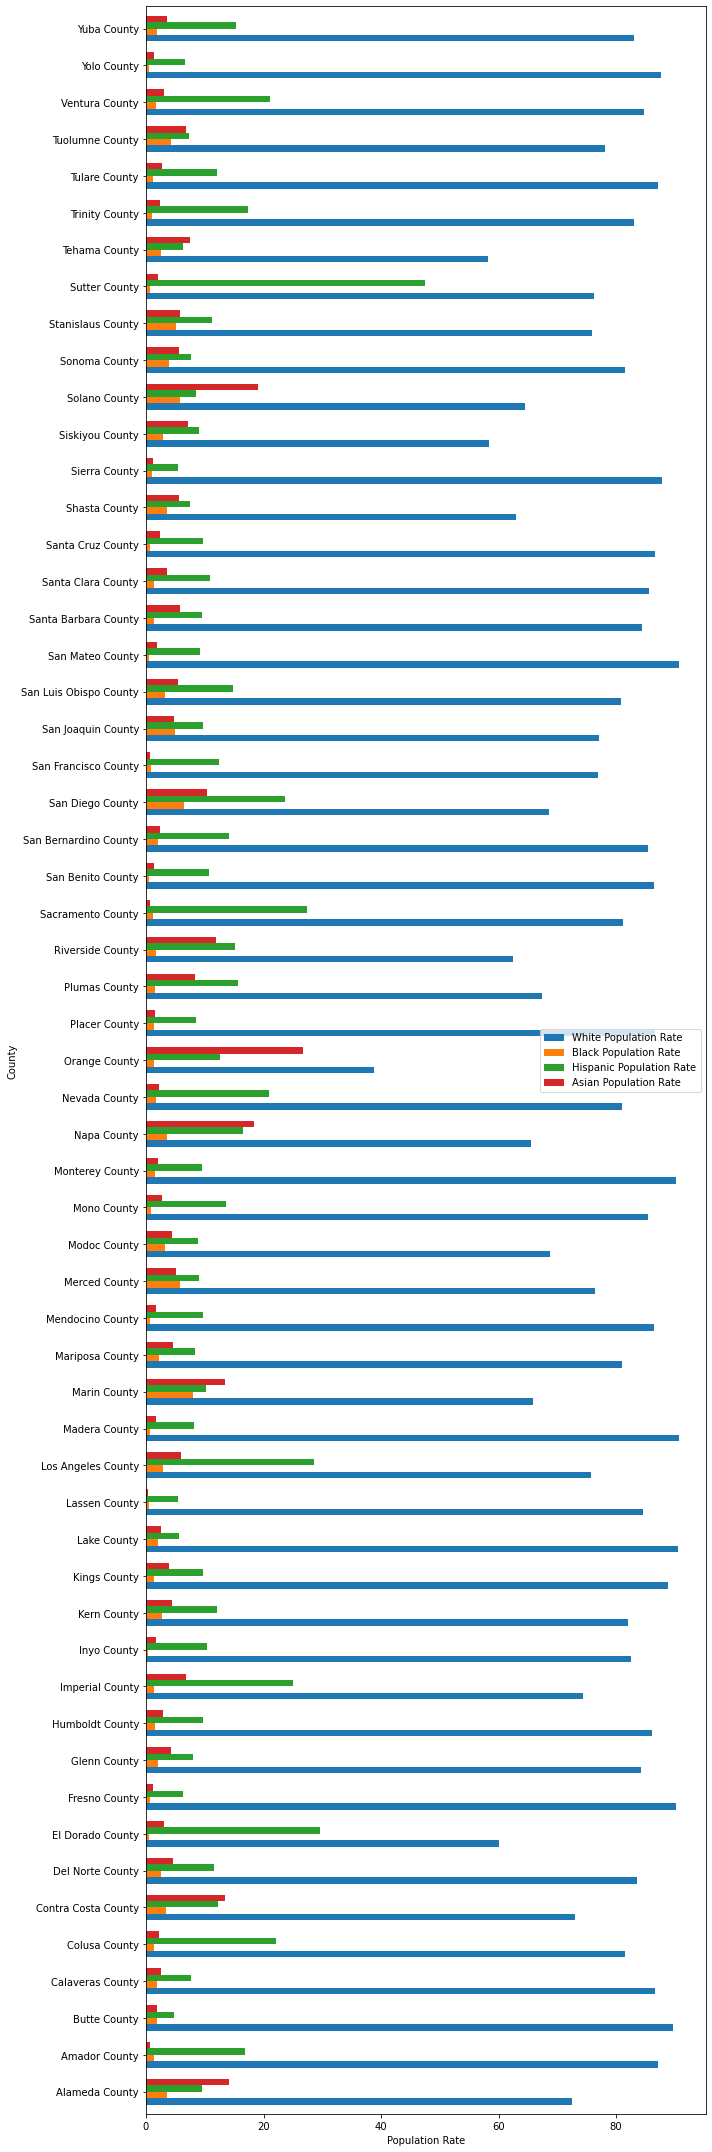

In [104]:
county_population.plot(kind="barh",width=.7,figsize=(10,30))
plt.xlabel("Population Rate")
plt.ylabel("County")
plt.tight_layout()
plt.show()

### *Scatter Plot White Population Rate Vs House Value*

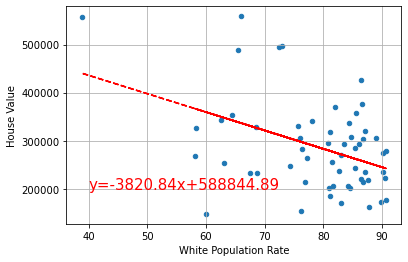

In [40]:
x_values=county_data["White Population Rate"]
y_values=county_data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

county_data.plot(kind="scatter",x="White Population Rate",y="House Value",grid=True)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(40,200000),fontsize=15,color="red")

plt.show()

### *Scatter Plot  White Population Rate Vs Monthly Rent*

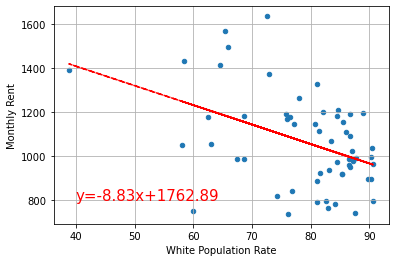

In [54]:
x_values=county_data["White Population Rate"]
y_values=county_data["Monthly Rent"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

county_data.plot(kind="scatter",x="White Population Rate",y="Monthly Rent",grid=True)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(40,800),fontsize=15,color="red")

plt.show()

### *Scatter plot Black Population Rate Vs House Value*

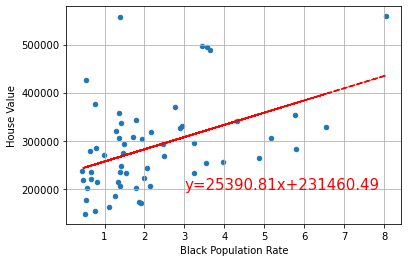

In [44]:
x_values=county_data["Black Population Rate"]
y_values=county_data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

county_data.plot(kind="scatter",x="Black Population Rate",y="House Value",grid=True)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(3,200000),fontsize=15,color="red")

plt.show()

### *Scatter Plot Black Population Rate Vs Monthly Rent*

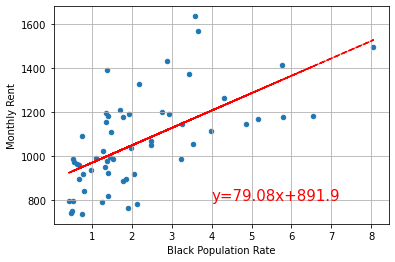

In [58]:
x_values=county_data["Black Population Rate"]
y_values=county_data["Monthly Rent"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

county_data.plot(kind="scatter",x="Black Population Rate",y="Monthly Rent",grid=True)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(4,800),fontsize=15,color="red")

plt.show()

### *Scatter Plot Hispanic Population Rate Vs House Value*

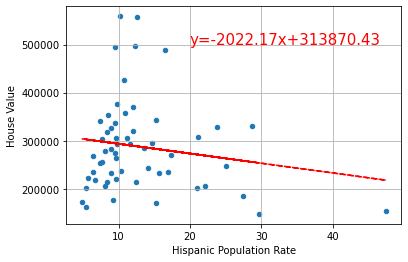

In [47]:
x_values=county_data["Hispanic Population Rate"]
y_values=county_data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

county_data.plot(kind="scatter",x="Hispanic Population Rate",y="House Value",grid=True)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(20,500000),fontsize=15,color="red")

plt.show()

### *Scatter Plot Hispanic Population Rate Vs Monthly Rent*

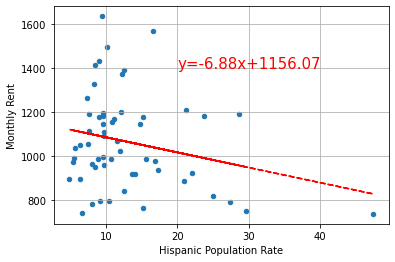

In [105]:
x_values=county_data["Hispanic Population Rate"]
y_values=county_data["Monthly Rent"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

county_data.plot(kind="scatter",x="Hispanic Population Rate",y="Monthly Rent",grid=True)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(20,1400),fontsize=15,color="red")

plt.show()

### *Scatter Plot Asian Population Rate vs House Value*

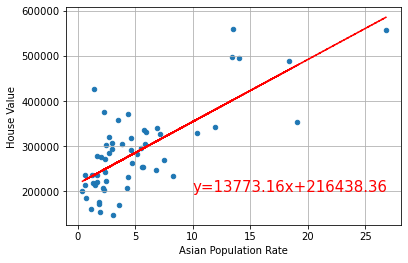

In [51]:
x_values=county_data["Asian Population Rate"]
y_values=county_data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

county_data.plot(kind="scatter",x="Asian Population Rate",y="House Value",grid=True)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(10,200000),fontsize=15,color="red")

plt.show()

### *Scatter Plot Asian Population Rate vs Monthly Rent*

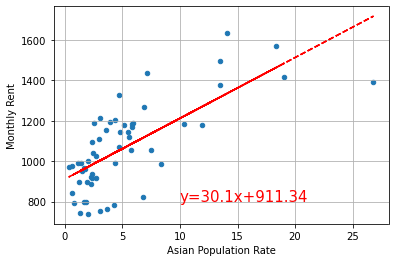

In [64]:
x_values=county_data["Asian Population Rate"]
y_values=county_data["Monthly Rent"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

county_data.plot(kind="scatter",x="Asian Population Rate",y="Monthly Rent",grid=True)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(10,800),fontsize=15,color="red")

plt.show()

### *Scatter Plot Per capita income vs House Value*

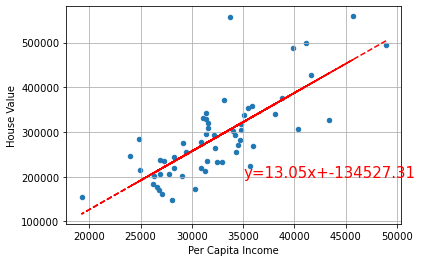

In [106]:
x_values=county_data["Per Capita Income"]
y_values=county_data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

county_data.plot(kind="scatter",x="Per Capita Income",y="House Value",grid=True)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(35000,200000),fontsize=15,color="red")

plt.show()

### *Scatter Plot Per Capita Income Vs Monthly Rent*

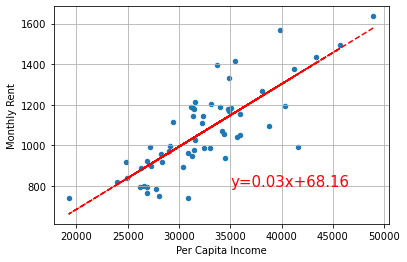

In [68]:
x_values=county_data["Per Capita Income"]
y_values=county_data["Monthly Rent"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

county_data.plot(kind="scatter",x="Per Capita Income",y="Monthly Rent",grid=True)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(35000,800),fontsize=15,color="red")

plt.show()

### *Scatter Plot Poverty Rate vs House Value*

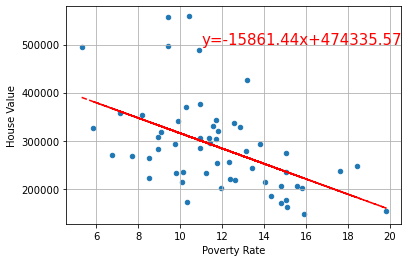

In [71]:
x_values=county_data["Poverty Rate"]
y_values=county_data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

county_data.plot(kind="scatter",x="Poverty Rate",y="House Value",grid=True)
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(11,500000),fontsize=15,color="red")

plt.show()